In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [2]:
# Assign variable names to genres
blues_files = glob("../audio-ml/Data/genres_original/blues/blues.*.wav")
# blues_files[:3]

classical_files = glob("../audio-ml/Data/genres_original/classical/classical.*.wav")
# classical_files[:3]

country_files = glob("../audio-ml/Data/genres_original/country/country.*.wav")
# country_files[:3]

disco_files = glob("../audio-ml/Data/genres_original/disco/disco.*.wav")
# disco_files[:3]

hiphop_files = glob("../audio-ml/Data/genres_original/hiphop/hiphop.*.wav")
# hiphop_files[:3]

jazz_files = glob("../audio-ml/Data/genres_original/jazz/jazz.*.wav")
# jazz_files[:3]

metal_files = glob("../audio-ml/Data/genres_original/metal/metal.*.wav")
# metal_files[:3]

pop_files = glob("../audio-ml/Data/genres_original/pop/pop.*.wav")
# pop_files[:3]

reggae_files = glob("../audio-ml/Data/genres_original/reggae/reggae.*.wav")
# reggae_files[:3]

rock_files = glob("../audio-ml/Data/genres_original/rock/rock.*.wav")
# rock_files[:3]

In [75]:
# Play example Audio file
ipd.Audio(pop_files[1])

In [76]:
# Load one file, print features
y, sr = librosa.load(pop_files[1], sr=None)
print(f"y: {y[:5]}")
print(f"y shape: {y.shape}")
print(f"sampling rate: {sr}")

y: [-0.13864136  0.14367676 -0.15341187 -0.006073    0.07800293]
y shape: (661504,)
sampling rate: 22050


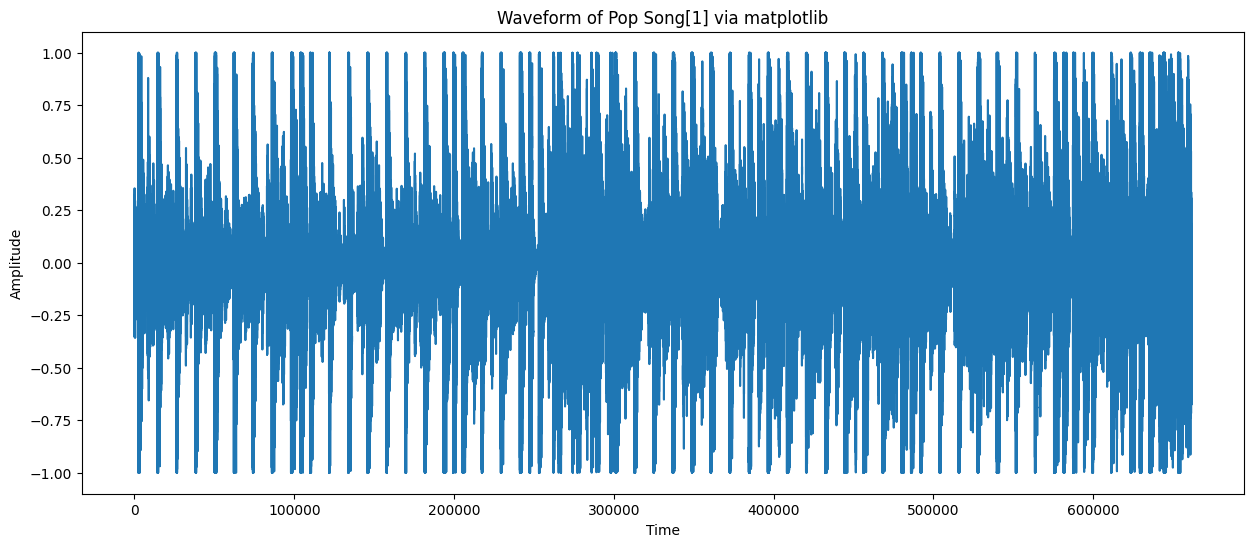

In [77]:
plt.figure(figsize=(15, 6))
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveform of Pop Song[1] via matplotlib");

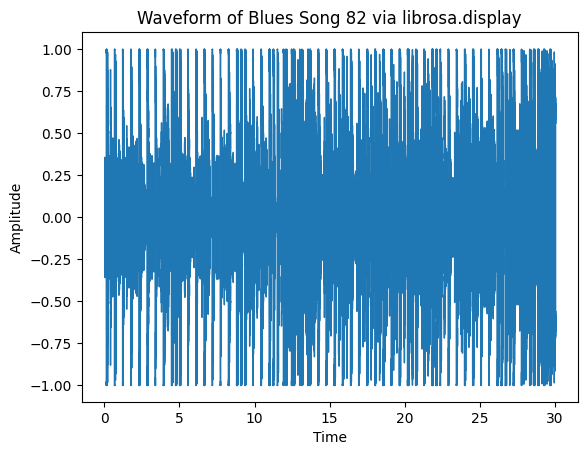

In [78]:
# Plot audio waveform using librosa.display
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Blues Song 82 via librosa.display")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

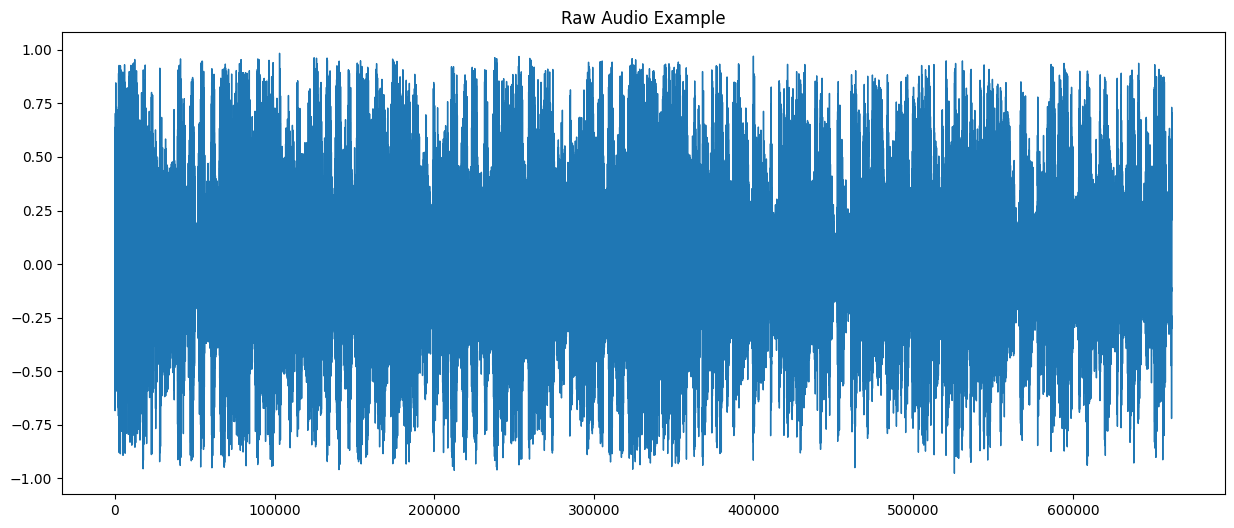

In [11]:
pd.Series(y).plot(figsize=(15, 6),
                  lw=1, 
                  title="Raw Audio Example");

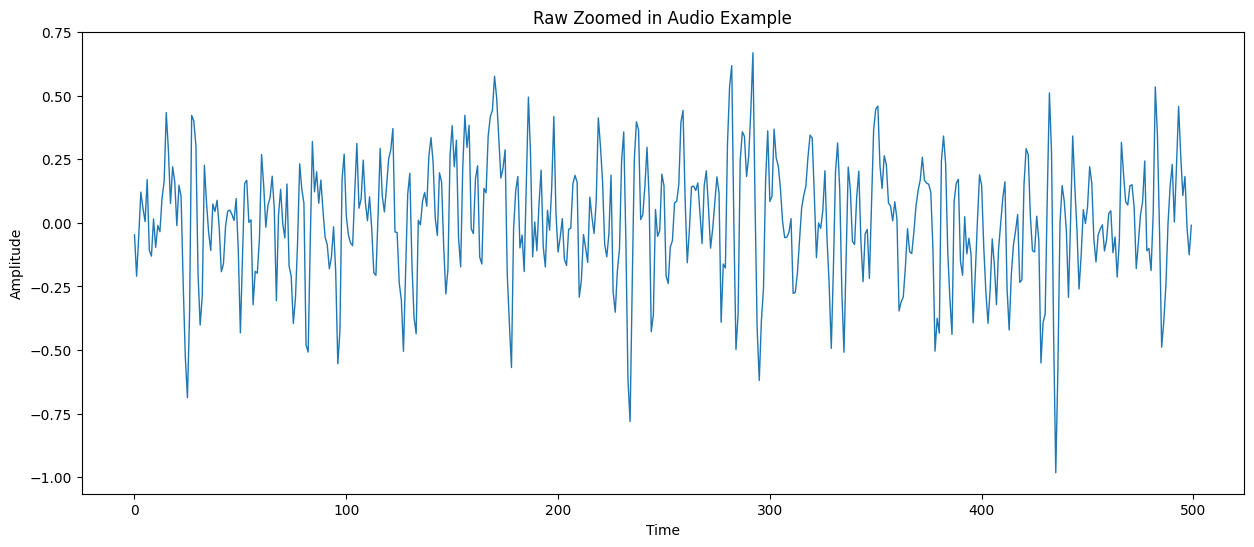

In [79]:
pd.Series(y[100000: 100500]).plot(figsize=(15, 6),
                                  lw=1,
                                  title="Raw Zoomed in Audio Example")
plt.xlabel("Time")
plt.ylabel("Amplitude");

In [80]:
# Amplify the signal
y_amplified = y*1.5
print(y_amplified[:5])

[-0.20796204  0.21551514 -0.2301178  -0.0091095   0.11700439]


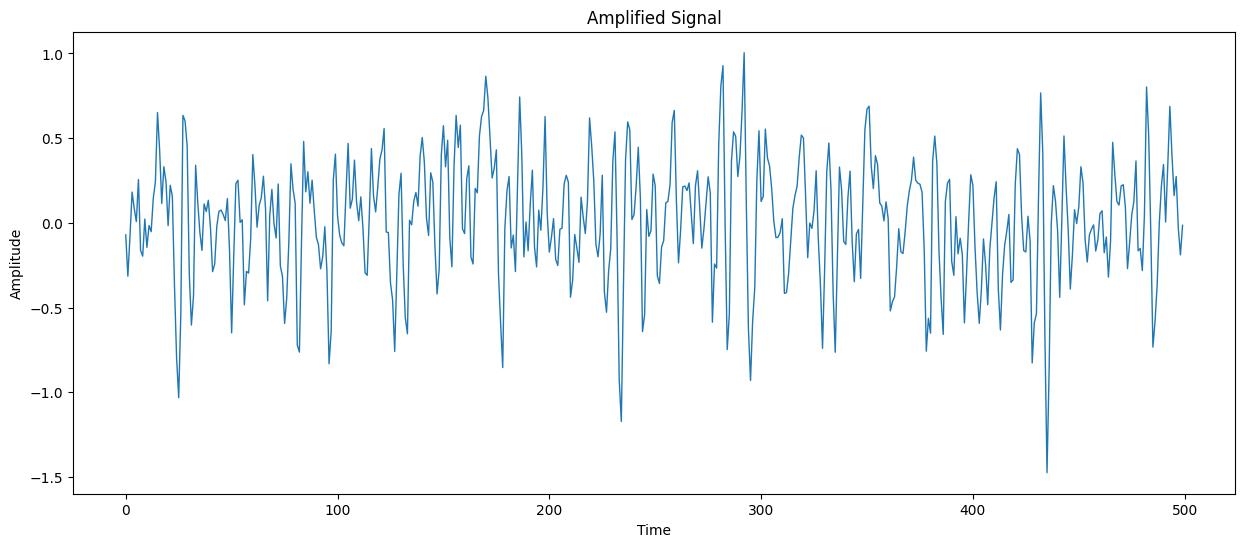

In [81]:
# Amplified signal plot zoomed in
plt.figure(figsize=(15,6))
plt.plot(y_amplified[100000: 100500], lw=1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Amplified Signal");

In [82]:
# Attenuated signal
y_attenuated = y*0.5
print(y_attenuated[:5])

[-0.06932068  0.07183838 -0.07670593 -0.0030365   0.03900146]


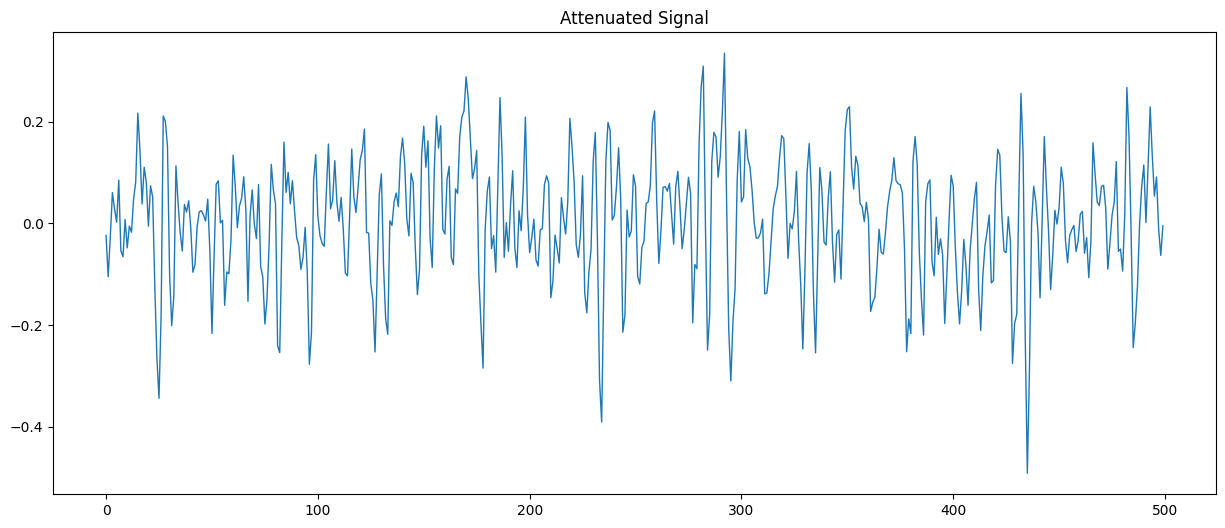

In [83]:
# Attenuated signal plot zoomed in
plt.figure(figsize=(15,6))
plt.plot(y_attenuated[100000: 100500], lw=1)
plt.title("Attenuated Signal");

**Only the relative amplitudes change**

In [84]:
# Librosa.load documentation
librosa.load?

Signature:
librosa.load(
    path: 'Union[str, int, os.PathLike[Any], sf.SoundFile, audioread.AudioFile, BinaryIO]',
    *,
    sr: 'Optional[float]' = 22050,
    mono: 'bool' = True,
    offset: 'float' = 0.0,
    duration: 'Optional[float]' = None,
    dtype: 'DTypeLike' = <class 'numpy.float32'>,
    res_type: 'str' = 'soxr_hq',
) -> 'Tuple[np.ndarray, Union[int, float]]'
Docstring:
Load an audio file as a floating point time series.

Audio will be automatically resampled to the given rate
(default ``sr=22050``).

To preserve the native sampling rate of the file, use ``sr=None``.

Parameters
----------
path : string, int, pathlib.Path, soundfile.SoundFile, audioread object, or file-like object
    path to the input file.

    Any codec supported by `soundfile` or `audioread` will work.

    Any string file paths, or any object implementing Python's
    file interface (e.g. `pathlib.Path`) are supported as `path`.

    If the codec is supported by `soundfile`, then `path` can also be

In [85]:
# Max value
max_val = np.max(y)
max_val

np.float32(0.9999695)

In [86]:
# Listen to Amplified Audio
ipd.Audio(data=y_amplified, rate=22050)

In [87]:
# Listen to Attenuated Audio
ipd.Audio(y_attenuated, rate=22050)

In [88]:
# Compare with Normal
ipd.Audio(data=y, rate=22050)

**I feel like they sound the same**

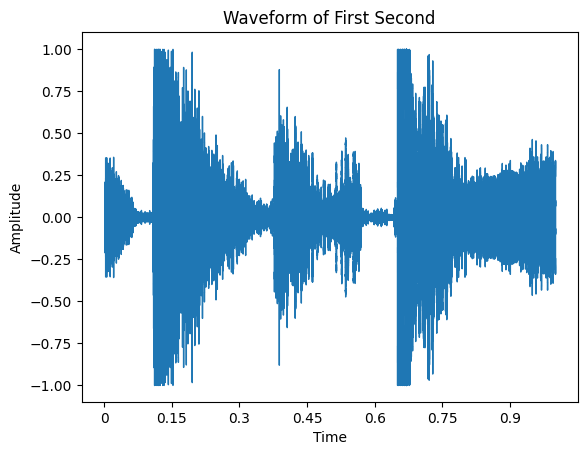

In [89]:
# Plot the first second
librosa.display.waveshow(y[:sr], sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveform of First Second");

In [90]:
# Listen to first second
ipd.Audio(y[:sr], rate=sr)

In [91]:
# Basic stats
mean = np.mean(y)
print(f"y mean: {mean}")
print(f"max amplitude: {max_val}")

y mean: -0.00024345425481442362
max amplitude: 0.999969482421875


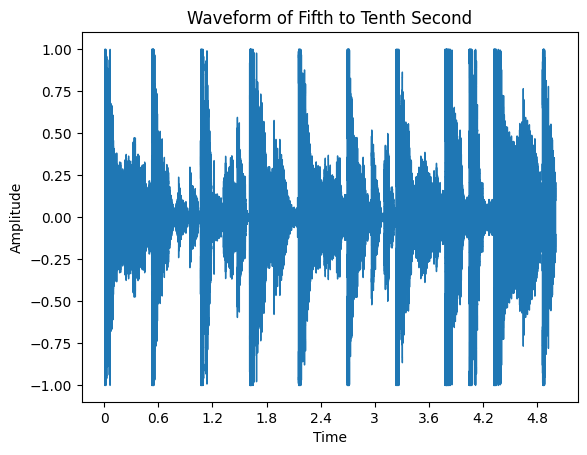

In [92]:
# Plot 5-10 seconds
librosa.display.waveshow(y[sr*5:sr*10], sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveform of Fifth to Tenth Second");

In [93]:
# Listen to 5-10 seconds
ipd.Audio(y[sr*5: sr*10], rate=sr)

In [109]:
# Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f'Estimated tempo: {round(float(tempo), 2)} beats per minute')

Estimated tempo: 112.35 beats per minute


/tmp/ipykernel_4000/4104819403.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Estimated tempo: {round(float(tempo), 2)} beats per minute')
